<a href="https://colab.research.google.com/github/kadamatharva26/EDA-Terrorism/blob/main/Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK-4

#Exploratory Data Analysis - Terrorism

In [24]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#read the csv file
df=pd.read_csv('Terrorism.csv',encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [27]:
df.shape

(53051, 135)

In [28]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    53025
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       47794
Length: 135, dtype: int64

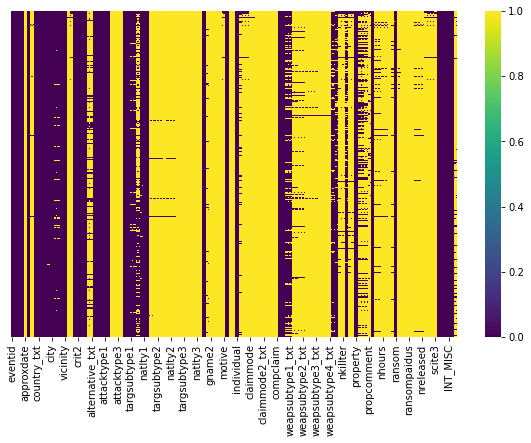

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [35]:
#dropping the Null values
drop_col=df.isnull().sum()[df.isnull().sum()>(50/100 * df.shape[0])]
drop_col

approxdate     53025
resolution     52178
location       52286
summary        51793
alternative    44280
               ...  
addnotes       52086
scite1         51793
scite2         51927
scite3         52254
related        47794
Length: 86, dtype: int64

In [36]:
drop_col.index

Index(['approxdate', 'resolution', 'location', 'summary', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'corp1', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt',
       'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2',
       'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3',
       'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4',
       'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'nkillus',
       'nkillter', 'nwoundus', 'nwoundte', 'propextent',

In [19]:
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [37]:
df.drop(drop_col.index,axis=1,inplace=True)

In [38]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nwound,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,1,1,0,0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0.0,13.0,Unknown,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,PGIS,0.0,0.0,0.0,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,1,1,1,0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0.0,13.0,Unknown,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,PGIS,0.0,1.0,1.0,1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,1,1,1,0,0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0.0,13.0,Unknown,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,PGIS,-9.0,-9.0,1.0,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0.0,6.0,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,1.0,0.0,0.0,PGIS,-9.0,-9.0,1.0,1.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,1,1,1,-9,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0.0,8.0,Incendiary,NaN,NaN,Incendiary,NaN,NaN,1.0,0.0,0.0,PGIS,-9.0,-9.0,1.0,1.0


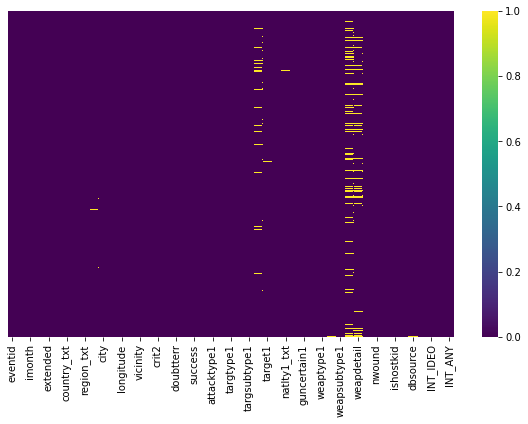

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [41]:
df.fillna(df.mean(),inplace=True)

In [43]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound',
       'property', 'ishostkid', 'ransom', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [44]:
df.drop(['weapsubtype1_txt','weapdetail','target1'],axis=1)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,nkill,nwound,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,1,1,0,0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,58.0,Dominican Republic,MANO-D,0.000000,0.000000,13.000000,Unknown,9.945986,1.000000,0.000000,0.00000,0.000000,0.000000,PGIS,0.000000,0.000000,0.000000,0.000000
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,1,1,1,0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",21.0,Belgium,23rd of September Communist League,0.000000,0.000000,13.000000,Unknown,9.945986,0.000000,0.000000,0.00000,1.000000,1.000000,PGIS,0.000000,1.000000,1.000000,1.000000
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,1,1,1,0,0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,217.0,United States,Unknown,0.000000,0.000000,13.000000,Unknown,9.945986,1.000000,0.000000,0.00000,0.000000,0.000000,PGIS,-9.000000,-9.000000,1.000000,1.000000
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,217.0,United States,Unknown,0.000000,0.000000,6.000000,Explosives,16.000000,2.075236,1.704732,1.00000,0.000000,0.000000,PGIS,-9.000000,-9.000000,1.000000,1.000000
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,1,1,1,-9,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,217.0,United States,Unknown,0.000000,0.000000,8.000000,Incendiary,9.945986,2.075236,1.704732,1.00000,0.000000,0.000000,PGIS,-9.000000,-9.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53046,199209180006,1992,9,18,0,156,Panama,2,Central America & Caribbean,Panama,Panama City,8.994269,-79.518792,1,0,1,1,1,0,0,1,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,156.0,Panama,Panama Defense Force,0.000000,0.000000,6.000000,Explosives,16.000000,0.000000,0.000000,1.00000,0.000000,0.000000,PGIS,0.000000,0.000000,0.000000,0.000000
53047,199209180007,1992,9,18,0,156,Panama,2,Central America & Caribbean,Panama,Panama City,8.994269,-79.518792,1,0,1,1,1,0,0,1,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,156.0,Panama,Panama Defense Force,0.000000,0.000000,6.000000,Explosives,16.000000,0.000000,0.000000,1.00000,0.000000,0.000000,PGIS,0.000000,0.000000,0.000000,0.000000
53048,199209180008,1992,9,18,0,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,1,1,1,-9,0,0,0,3,Bombing/Explosion,1,Business,7.0,Retail/Grocery/Bakery,209.0,Turkey,Unknown,0.000000,0.000000,6.000000,Explosives,16.000000,0.000000,0.000000,1.00000,0.000000,0.000000,PGIS,-9.000000,-9.000000,0.000000,-9.000000
53049,199209180009,1992,9,18,0,228,Yemen,10,Middle East & North Africa,Amanat Al Asimah,Sanaa,15.325443,44.211895,1,0,1,1,1,0,0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,228.0,Yemen,Unknown,0.000000,0.000000,6.000000,Explosives,16.000000,0.000000,0.000000,1.00000,0.000000,0.000000,PGIS,-9.000000,-9.000000,0.000000,-9.000000


In [47]:
#getting quick insights of the dataset
df.describe(include='all')

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nwound,property,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.305100e+04,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051,53051.000000,53051,52812,53051,53051.000000,5.305100e+04,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53051,53051.000000,53051,53051.000000,50771,52666,53051.000000,52822,53051,53051.000000,53051.000000,53051.000000,53050,53051.000000,45025,48921,53051.000000,53051.000000,53051.000000,53051.000000,53051.000000,53050,53051.000000,53051.000000,53051.000000,53051.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,176,NaN,12,1295,9945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,22,NaN,110,30975,NaN,182,1784,NaN,NaN,NaN,12,NaN,29,2061,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Peru,NaN,South America,Northern Ireland,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bombing/Explosion,NaN,Business,NaN,Military Unit/Patrol/Convoy,Military Unit,NaN,Peru,Unknown,NaN,NaN,NaN,Explosives,NaN,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,PGIS,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,5661,NaN,13797,3115,3261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23242,NaN,9281,NaN,4308,1531,NaN,5422,16078,NaN,NaN,NaN,23356,NaN,19188,17927,NaN,NaN,NaN,NaN,NaN,49462,NaN,NaN,NaN,NaN
mean,1.984685e+11,1984.619668,6.346742,15.343537,0.016437,152.438088,NaN,5.405836,NaN,NaN,NaN,16.980236,-1.738413e+03,1.419389,0.035871,0.990519,0.991612,0.855309,-1.380068,0.099112,0.919210,0.000792,2.994967,NaN,7.678102,NaN,44.721475,NaN,NaN,130.142668,NaN,NaN,0.045768,0.001112,6.386635,NaN,9.945986,NaN,NaN,2.075236,1.704732,0.724920,0.060936,0.010571,NaN,-3.214138,-3.171762,0.151065,-2.482092
std,5.432548e+08,5.433299,3.354164,8.833502,0.127150,137.827228,NaN,3.188807,NaN,NaN,NaN,24.482146,3.741873e+05,1.100270,0.185971,0.096911,0.091203,0.351792,3.488383,0.298815,0.272515,0.028126,1.861144,NaN,6.787059,NaN,32.431835,NaN,NaN,73.721712,NaN,NaN,0.208982,0.033330,2.177127,NaN,6.612601,NaN,NaN,7.933808,9.207621,0.604706,0.238818,0.101924,NaN,4.382506,4.433211,0.700927,4.331777
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,4.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,-9.000000,0.000000,0.000000,NaN,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.981041e+11,1981.000000,3.000000,8.000000,0.000000,61.000000,NaN,3.000000,NaN,NaN,NaN,4.667128,-7.720719e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,NaN,2.000000,NaN,21.000000,NaN,NaN,61.000000,NaN,NaN,0.000000,0.000000,5.000000,NaN,3.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-9.000000,-9.000000,0.000000,-9.000000
50%,1.985103e+11,1985.000000,6.000000,15.000000,0.000000,127.000000,NaN,5.000000,NaN,NaN,NaN,14.679084,-5.844443e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,4.000000,NaN,34.000000,NaN,NaN,142.000000,NaN,NaN,0.000000,0.000000,6.000000,NaN,9.945986,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
75%,1.989092e+11,1989.000000,9.000000,23.000000,0.000000,185.000000,NaN,8.000000,NaN,NaN,NaN,37.997490,2.813273e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,14.000000,NaN,74.000000,NaN,NaN,185.000000,NaN,NaN,0.000000,0.000

In [48]:
#finding the corelation 
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999972,-0.019565,0.012295,-0.023286,-0.191441,0.051859,-0.251182,0.002032,0.087652,0.102329,-0.023207,-0.002074,-0.027633,-0.031336,0.103290,0.022381,0.007363,-0.079694,0.073064,0.071134,-0.123827,-0.009357,-0.026265,-0.096792,-0.107189,0.028096,0.014444,0.119315,-0.064863,-0.098314,0.018081,0.016224,-0.117476,-0.036652
iyear,0.999972,1.000000,-0.025768,0.012183,-0.023257,-0.191465,0.052035,-0.250904,0.002078,0.087725,0.102340,-0.023388,-0.002064,-0.027638,-0.031276,0.103377,0.022354,0.007274,-0.079569,0.073077,0.071125,-0.123771,-0.009300,-0.026288,-0.096608,-0.107160,0.028058,0.014372,0.119214,-0.064833,-0.098266,0.018082,0.016225,-0.117520,-0.036601
imonth,-0.019565,-0.025768,1.000000,-0.003266,-0.000193,0.008308,-0.025887,-0.033727,-0.007312,-0.014928,-0.004740,0.001184,-0.001276,0.002821,-0.008817,-0.017400,0.005097,0.014074,-0.017216,-0.005016,-0.001523,-0.003880,-0.007201,0.003970,-0.026696,-0.004795,0.005354,0.011242,0.009473,-0.001730,-0.005492,-0.004442,-0.004310,0.010348,-0.010748
iday,0.012295,0.012183,-0.003266,1.000000,-0.006739,0.011753,0.007752,-0.004552,-0.004239,-0.018928,-0.007605,0.004796,-0.001103,0.005471,-0.001282,-0.011100,-0.001124,0.000726,-0.025571,-0.015960,-0.017679,0.013987,0.005055,-0.002898,-0.015882,0.014357,-0.006299,-0.003643,0.012865,-0.011648,-0.006162,-0.002736,-0.003078,0.007621,0.002400
extended,-0.023286,-0.023257,-0.000193,-0.006739,1.000000,-0.043905,-0.003528,-0.010388,0.000537,0.018768,-0.001020,-0.010299,0.011890,0.037157,-0.040313,-0.033948,0.036149,-0.003639,0.179097,-0.022811,-0.015673,-0.007624,-0.011286,0.004582,0.163418,-0.057208,-0.010874,-0.016662,-0.132174,0.483495,0.361875,0.020254,0.025809,0.029245,0.029412
country,-0.191441,-0.191465,0.008308,0.011753,-0.043905,1.000000,0.316503,0.450018,0.000317,-0.084883,-0.020851,0.022513,-0.058455,-0.033070,0.099118,-0.065509,-0.072550,-0.007899,-0.043118,-0.060117,-0.064322,0.617986,-0.019288,0.008453,-0.042223,0.006284,-0.032382,0.004396,-0.111209,-0.075926,-0.023819,0.134505,0.128481,0.291191,0.233002
region,0.051859,0.052035,-0.025887,0.007752,-0.003528,0.316503,1.000000,0.381568,0.004802,-0.071754,0.098242,-0.000785,-0.044101,0.070763,-0.097617,-0.107595,-0.077756,0.033198,-0.020498,-0.015855,-0.018028,0.296902,-0.024506,-0.032978,0.037438,0.056378,-0.030876,0.060510,-0.020928,-0.058504,-0.021519,-0.041964,-0.038273,0.138984,0.054879
latitude,-0.251182,-0.250904,-0.033727,-0.004552,-0.010388,0.450018,0.381568,1.000000,0.000825,-0.030534,-0.045842,0.014398,-0.047131,-0.032800,-0.006768,-0.074103,-0.087171,0.011750,0.016550,-0.099496,-0.100683,0.267751,-0.040189,0.026300,0.006723,0.009664,-0.046065,0.021632,-0.103683,-0.026862,-0.004079,0.025135,0.026378,0.190368,0.127585
longitude,0.002032,0.002078,-0.007312,-0.004239,0.000537,0.000317,0.004802,0.000825,1.000000,0.000847,0.000850,-0.000427,-0.000421,-0.001685,0.009422,0.001407,-0.001332,0.000127,0.002315,-0.006653,-0.007185,-0.000817,0.000971,0.000148,0.002750,0.005298,-0.001659,0.000814,-0.001999,0.001071,0.000422,0.005665,0.005643,0.000980,0.006499
specificity,0.087652,0.087725,-0.014928,-0.018928,0.018768,-0.084883,-0.071754,-0.030534,0.000847,1.000000,0.028089,0.002643,0.017212,-0.109759,0.056652,0.078310,0.059127,-0.002811,0.009398,0.090154,0.086871,-0.055503,-0.025192,-0.011691,0.019482,-0.113770,0.077555,-0.008492,0.032504,0.032638,0.011201,0.073941,0.071581,-0.067902,0.033357


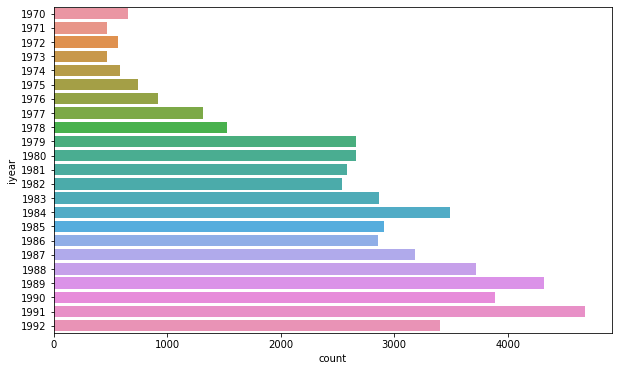

In [57]:
#plotting to understand number of attacks per year
plt.figure(figsize=(10,6))
sns.countplot(y=df['iyear'])

In [60]:
from ipywidgets import interact

In [63]:
#visualizing attacks with respect to regions per year
@interact

def attack_year(year=list(df['iyear'].unique())):
    a = df[df['iyear']==year]
    return sns.countplot(y=a['region'], palette='viridis')

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

Text(0.5, 1.0, 'Trend of terror attacks in each region')

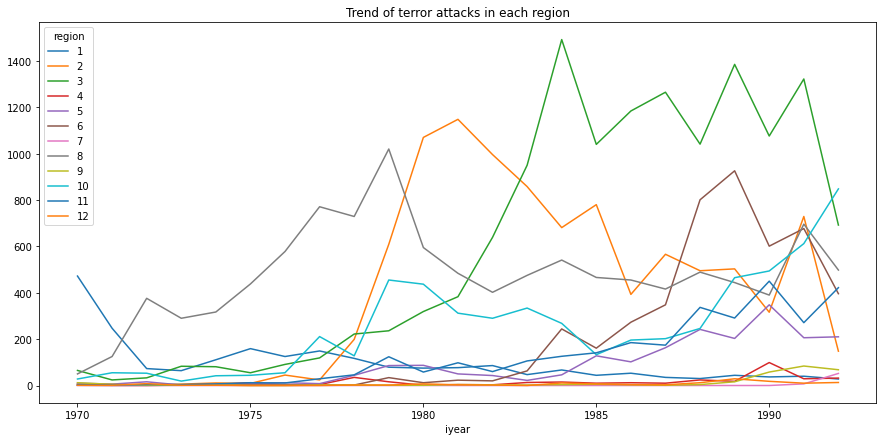

In [69]:
#Trend of attacks in each region
terror_area=pd.crosstab(df.iyear,df.region)
terror_area.plot()
plt.title('Trend of terror attacks in each region')